<div style="background-color: #A81C02; color: white; font-variant: small-caps; padding: 10px; text-align: center;">
  <span style="font-size: 14pt;">Part 02:</span>
  <span style="font-size: 26pt; font-weight: bold;"> Exploratory Data Analysis</span>
  <span style="font-size: 14pt; font-weight: bold;"> (EDA)</span>
</div>

<div style="background-color: #A81C02; color: white; padding: 10px; text-align: center;">
  <span style="font-size: 14pt; font-weight: bold; font-color: #87B5D6"> Uncovering Patterns and Relationships in U.S. Border Entry Data </span><br>  
</div>

<div style="background-color: #CF2102; padding: 10px; margin-top: 10px;">
  <b>Importing Python libraries and loading required dataset.</b>
</div>

In [136]:

# Importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle
from matplotlib.colors import LinearSegmentedColormap

In [137]:

# Loading the prepared datasets
#state_table
file_path_state_table = '../Capstone Project/state_table.csv'
state_table = pd.read_csv(file_path_state_table)
print('state_table loaded.')

#border_table
file_path_border_table = '../Capstone Project/border_table.csv'
border_table = pd.read_csv(file_path_border_table)
print('border_table loaded.')

#measure_table
file_path_measure_table = '../Capstone Project/measure_table.csv'
measure_table = pd.read_csv(file_path_measure_table)
print('measure_table loaded.')

#port_table
file_path_port_table = '../Capstone Project/port_table.csv'
port_table = pd.read_csv(file_path_port_table)
print('port_table loaded.')

#month_table
file_path_month_table = '../Capstone Project/month_table.csv'
month_table = pd.read_csv(file_path_month_table)
print('month_table loaded.')

#finalized_broder_crossing_df
file_path_finalized_broder_crossing_df = '../Capstone Project/finalized_broder_crossing_df.csv'
finalized_broder_crossing_df = pd.read_csv(file_path_finalized_broder_crossing_df)
print('finalized_broder_crossing_df loaded.')

state_table loaded.
border_table loaded.
measure_table loaded.
port_table loaded.
month_table loaded.
finalized_broder_crossing_df loaded.



<div style="background-color: #CF2102; padding: 10px;">
<b>Min Max for Year-wise, State-wise, Port-wise, Measure-wise<b>
</div>


In [138]:

df = pd.read_csv(file_path_finalized_broder_crossing_df)
# Display min and max values for key numerical columns
min_max_summary = df[['Value', 'Year']].agg(['min', 'max']).T
min_max_summary.columns = ['Min', 'Max']
min_max_summary
#df.describe().T[['min', 'max']]

,Min,Max
Value,0,2470347
Year,2015,2024


In [139]:

min_max_year = df.groupby('Year')['Value'].agg(['min', 'max']).reset_index()
min_max_year.to_csv('min_max_year.csv', index=False)
min_max_year.head(2)

,Year,min,max
0,2015,0,2269563
1,2016,0,2138861


In [140]:

min_max_month = df.groupby('Month')['Value'].agg(['min', 'max']).reset_index()
min_max_month.to_csv('min_max_month.csv', index=False)
min_max_month.head(2)

,Month,min,max
0,1,0,2298003
1,2,0,2144131


In [141]:

min_max_port = df.groupby('Port Code')['Value'].agg(['min', 'max']).reset_index()
min_max_port.to_csv('min_max_port.csv', index=False)
min_max_port.head(2)

,Port Code,min,max
0,101,0,8694
1,103,0,34879


In [142]:

min_max_measure = df.groupby('Measure_Code')['Value'].agg(['min', 'max']).reset_index()
min_max_measure.to_csv('min_max_measure.csv', index=False)
min_max_measure.head(2)

,Measure_Code,min,max
0,1,0,267884
1,2,0,4899


In [143]:

min_max_state = df.groupby('State_Code')['Value'].agg(['min', 'max']).reset_index()
min_max_state.to_csv('min_max_measure.csv', index=False)
min_max_state.head(2)

,State_Code,min,max
0,1,0,150385
1,2,0,50839



<div style="background-color: #CF2102; padding: 10px;">
<b>Overview Analysis<b>
</div>


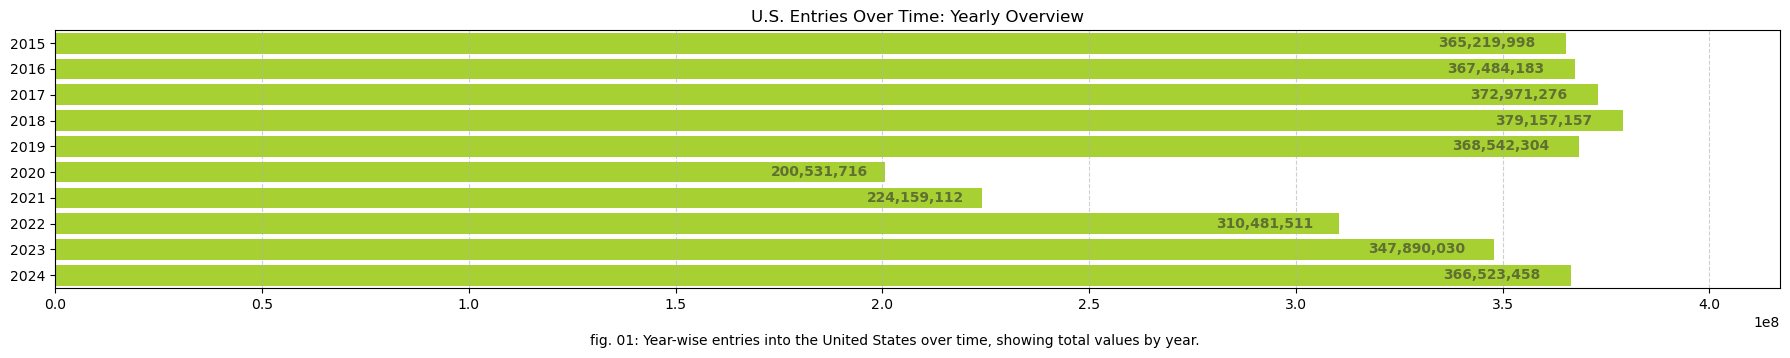

In [144]:

year_entry = finalized_broder_crossing_df.groupby('Year')['Value'].sum().reset_index()
# Plot
fig, ax = plt.subplots(figsize=(18, 3.5))
bars = ax.barh(year_entry['Year'].astype(str), year_entry['Value'], color='#A7D132')

# Add value labels at the start of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width * 0.98, bar.get_y() + bar.get_height() / 2,  # position slightly inside the bar
             f"{width:,}", va='center', ha='right', color='#5F7032', fontsize=10, fontweight='bold')

# Axis labels and title
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("U.S. Entries Over Time: Yearly Overview")
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.set_xlim(0, year_entry['Value'].max() * 1.1)
ax.set_ylim(-0.5, len(year_entry) - 0.5)
ax.invert_yaxis()
fig.text(0.5, 0, "fig. 01: Year-wise entries into the United States over time, showing total values by year.", ha='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

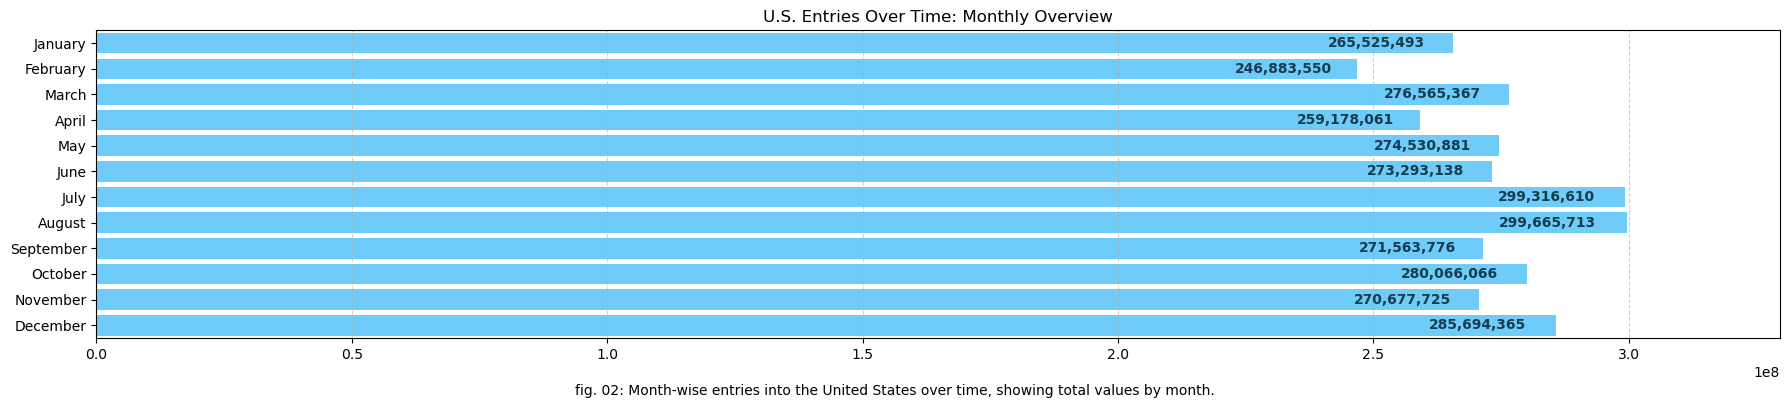

In [145]:

month_entry = finalized_broder_crossing_df.groupby('Month')['Value'].sum().reset_index()
month_entry = month_entry.merge(month_table, left_on='Month', right_on='Month_Number', how='left')
month_entry = month_entry.drop(columns=['Month_x', 'Month_Number'])
month_entry = month_entry.rename(columns={'Month_y': 'Month'})

# Plot
fig, ax = plt.subplots(figsize=(18, 4))
bars = ax.barh(month_entry['Month'], month_entry['Value'], color='#6FCBF7')

# Add value labels at the start of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width * 0.98, bar.get_y() + bar.get_height() / 2,  # position slightly inside the bar
             f"{width:,}", va='center', ha='right', color='#153D4F', fontsize=10, fontweight='bold')

# Axis and layout styling
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("U.S. Entries Over Time: Monthly Overview")
ax.grid(axis='x', linestyle='--', alpha=0.6)
ax.set_xlim(0, month_entry['Value'].max() * 1.1)
ax.set_ylim(-0.5, len(month_entry) - 0.5)
ax.invert_yaxis()
fig.text(0.5, 0, "fig. 02: Month-wise entries into the United States over time, showing total values by month.", ha='center', fontsize=10, color='black')
plt.tight_layout()
plt.show()

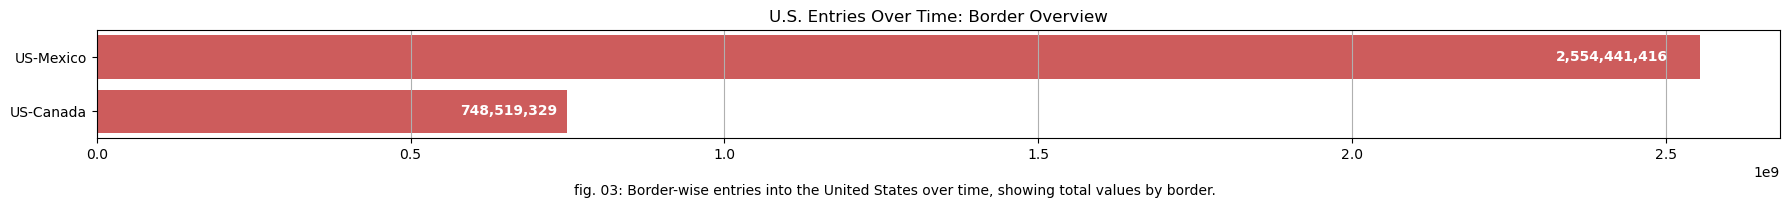

In [146]:

border_entry = finalized_broder_crossing_df.groupby('Border_Code')['Value'].sum().reset_index()
# Plot horizontal bar chart
merged_df = border_entry.merge(border_table, on='Border_Code')

plt.figure(figsize=(18, 2))
bars = plt.barh(merged_df['Border'], merged_df['Value'], color=['indianred'])

# Add white labels inside bars
for bar in bars:
    width = bar.get_width()
    plt.text(width * 0.98, bar.get_y() + bar.get_height() / 2,  # position slightly inside the bar
             f"{width:,}", va='center', ha='right', color='white', fontsize=10, fontweight='bold')

plt.title('U.S. Entries Over Time: Border Overview')
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='x')

# 👇 Add this line
plt.figtext(0.5, 0, "fig. 03: Border-wise entries into the United States over time, showing total values by border.", ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


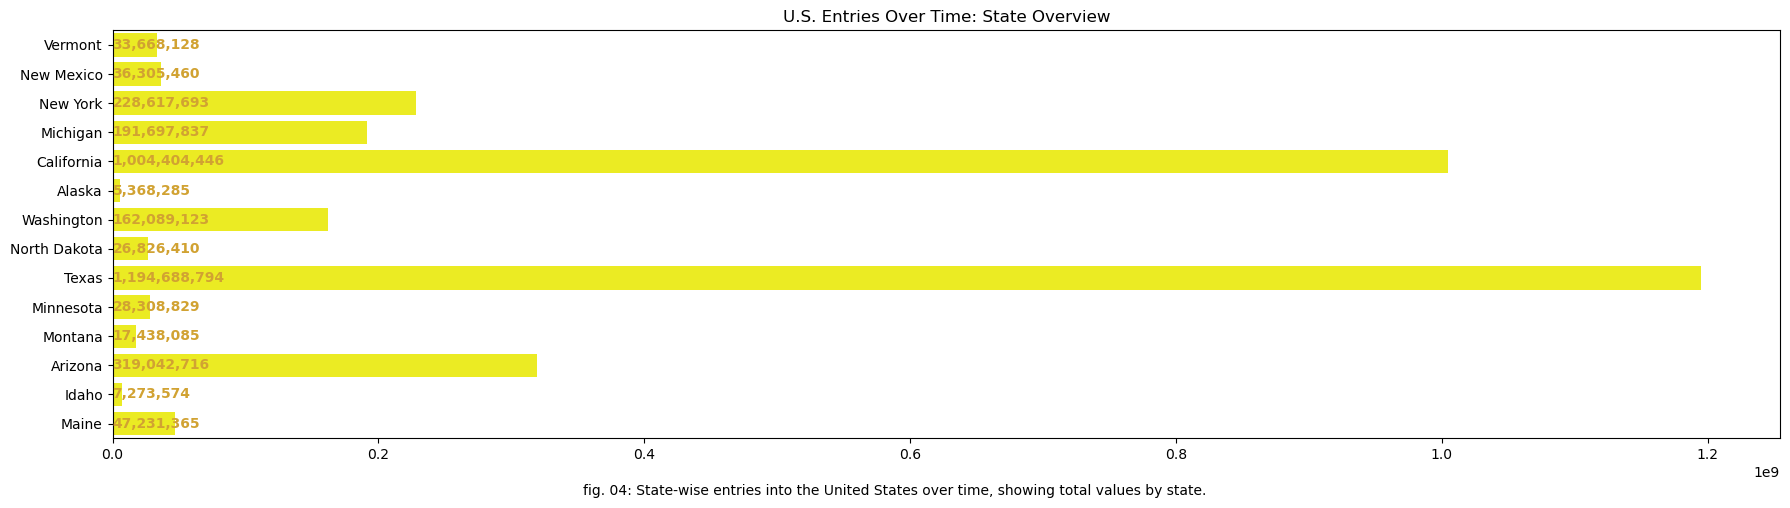

In [147]:

state_entry = finalized_broder_crossing_df.groupby('State_Code')['Value'].sum().reset_index()

# Merge to get state names
merged_df = state_entry.merge(state_table, on='State_Code')

# Sort for prettier bar chart (optional)
merged_df = merged_df.sort_values('State_Code')

# Plotting
fig, ax = plt.subplots(figsize=(18, 5))
bars = ax.barh(merged_df['State'], merged_df['Value'], color='#EBEB23')

# Add text inside bars
for bar, value in zip(bars, merged_df['Value']):
    ax.text(
        x=bar.get_x() + 10,  # small offset from left
        y=bar.get_y() + bar.get_height() / 2,
        s=f"{value:,}",  # comma formatting
        va='center',
        ha='left',
        color='#D1A232',
        fontsize=10,
        fontweight='bold'
    )

# Aesthetic tweaks
ax.set_ylim(-0.5, len(merged_df) - 0.5)
ax.set_xlabel('')
ax.set_title('U.S. Entries Over Time: State Overview')
fig.text(0.5, 0, "fig. 04: State-wise entries into the United States over time, showing total values by state.", ha='center', fontsize=10, color='Black')
plt.tight_layout()
plt.show()

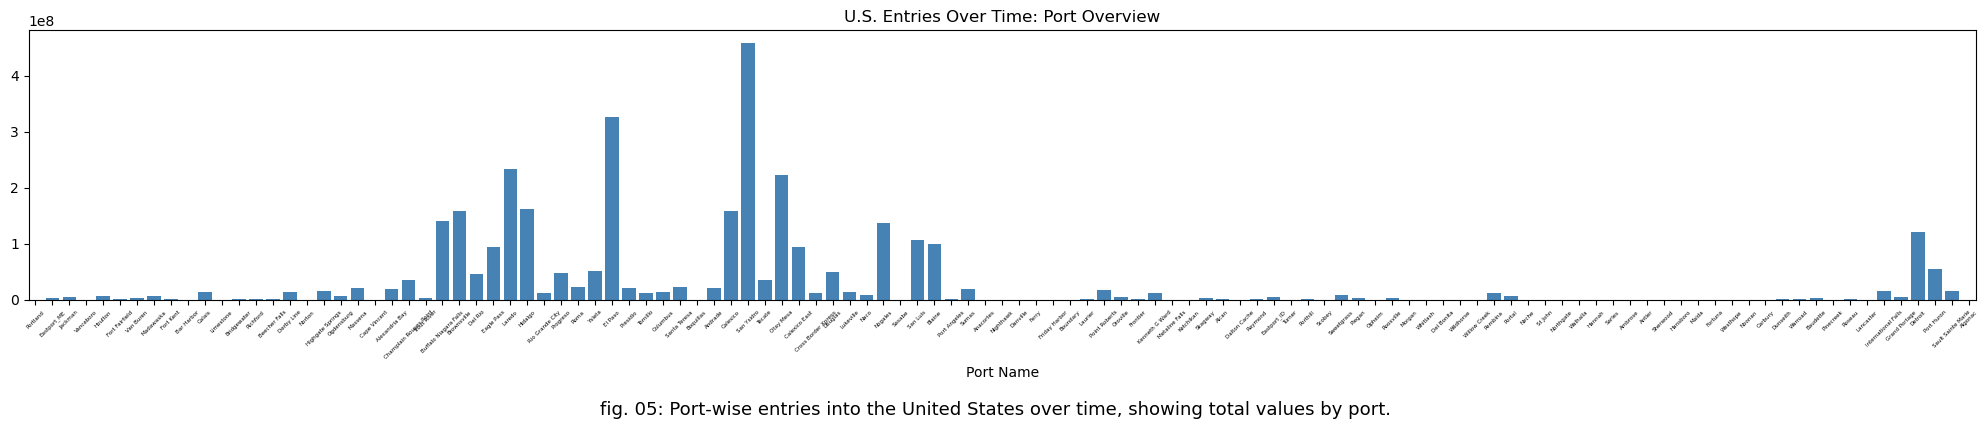

In [148]:

port_entry = finalized_broder_crossing_df.groupby('Port Code')['Value'].sum().reset_index()
port_entry = port_entry[['Port Code', 'Value']]

# Merge on Port Code
merged_df = pd.merge(port_entry, port_table, on='Port Code')

# Sort by Port Code
merged_df = merged_df.sort_values('Port Code')

# Plot
fig, ax = plt.subplots(figsize=(20, 4))

ax.bar(merged_df['Port Name'], merged_df['Value'], color='steelblue')

# Labels and styling
#ax.set_yscale('log') 
ax.set_xlabel('Port Name')
#ax.set_ylabel('Value (Log Scale)')
ax.set_ylabel('')
ax.set_title('U.S. Entries Over Time: Port Overview')
ax.margins(x=0)
fig.text(0.5, -0.05, "fig. 05: Port-wise entries into the United States over time, showing total values by port.", ha='center', fontsize=13, color='black')
plt.xticks(rotation=45, fontsize=4)
plt.tight_layout()
plt.show()

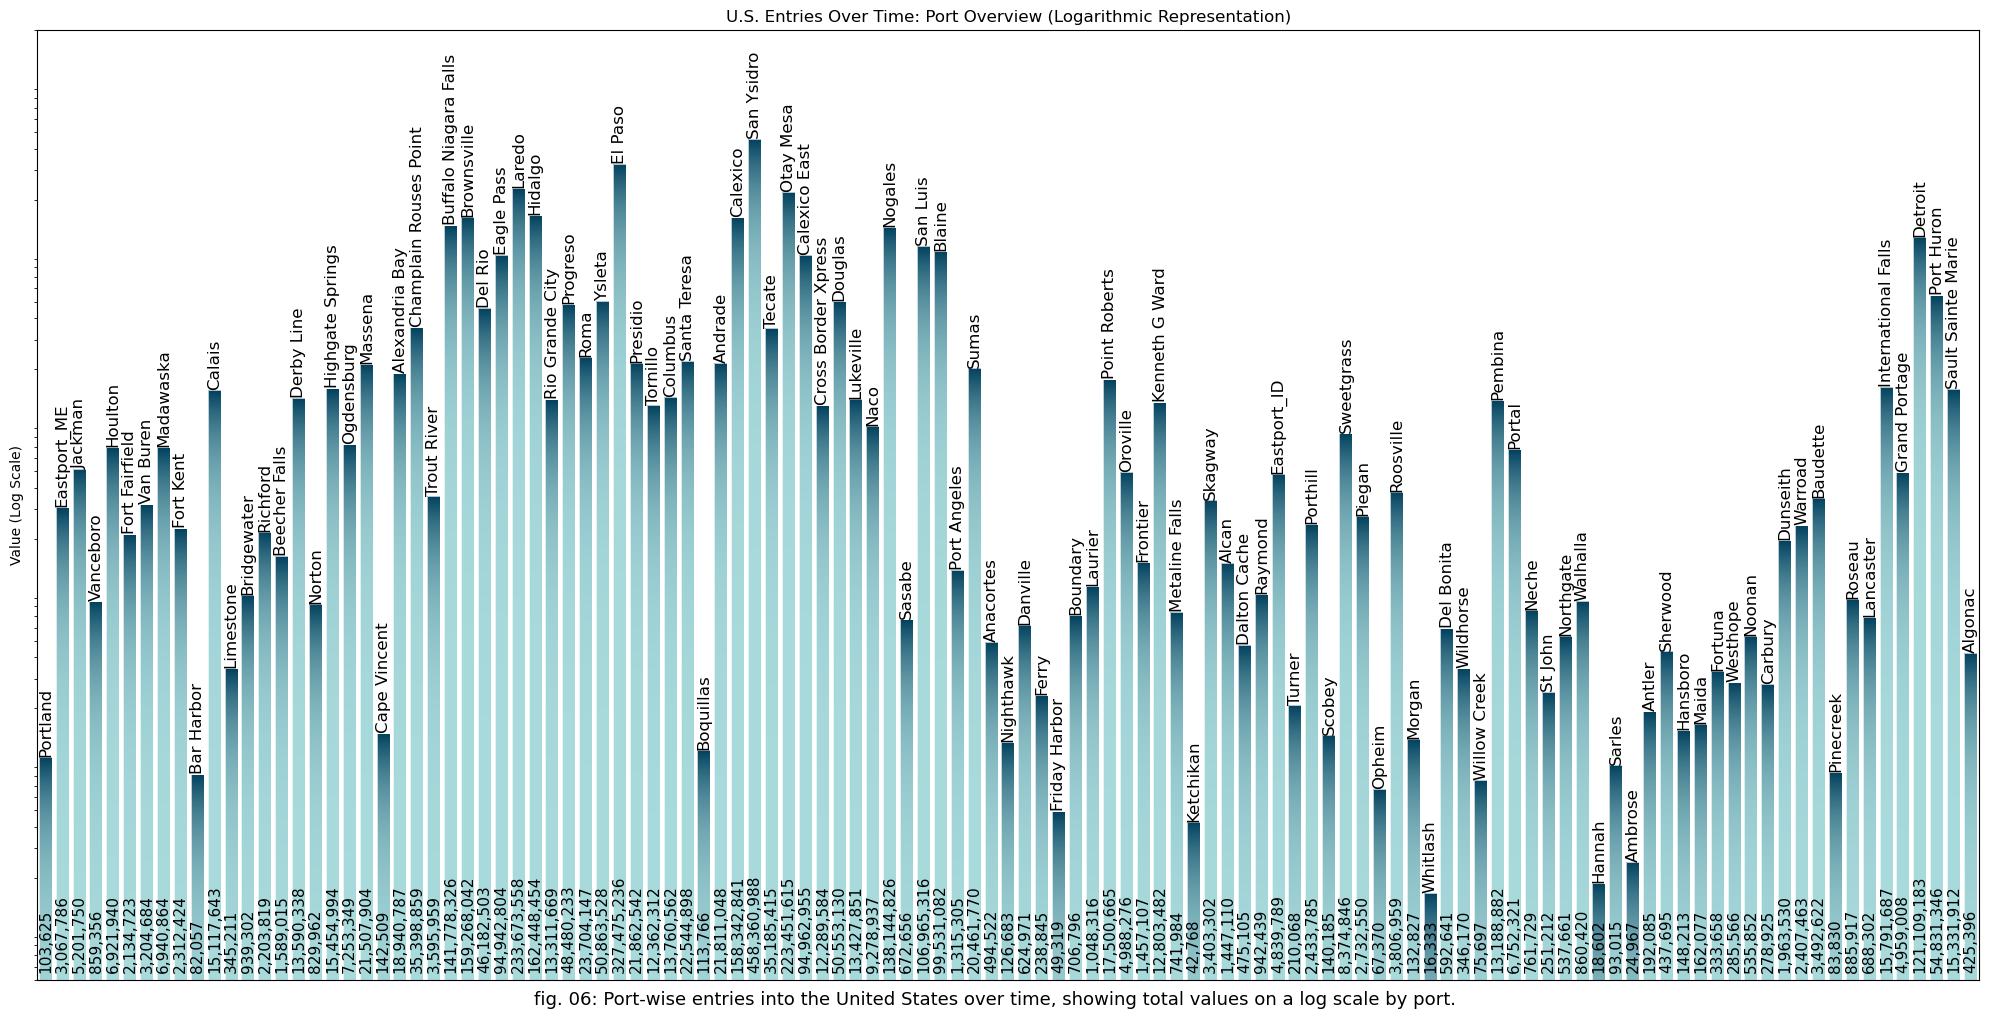

In [149]:

# Merge on Port Code
merged_df = pd.merge(port_entry, port_table, on='Port Code')
merged_df = merged_df.sort_values('Port Code')

# Set up figure
fig, ax = plt.subplots(figsize=(20, 10))

# Gradient colormap (light to dark blue)
cmap = LinearSegmentedColormap.from_list("custom_blue", ["#a8dadc", "#003f5c"])

# Draw gradient bars manually
for i, (port_name, value) in enumerate(zip(merged_df['Port Name'], merged_df['Value'])):
    # Vertical gradient as image
    gradient = np.linspace(0, 1, 256).reshape(256, 1)
    ax.imshow(
        gradient, extent=(i - 0.4, i + 0.4, 1, value),  # bottom = 1 for log scale safety
        aspect='auto', origin='lower', cmap=cmap, alpha=1, zorder=1
    )
    # Add thin white outline
    rect = Rectangle((i - 0.4, 1), 0.8, value - 1, linewidth=0.5, edgecolor='white', facecolor='none', zorder=2)
    ax.add_patch(rect)

# Port Name labels above bars
for i, port_name in enumerate(merged_df['Port Name']):
    ax.text(
        i, merged_df['Value'].iloc[i], port_name, rotation=90, ha='center', va='bottom', color='black', fontsize=12
    )

# Value labels at base of bars
for i, value in enumerate(merged_df['Value']):
    ax.text(
        i,
        5500,  # baseline text position for log scale
        f"{value:,}", rotation=90, ha='center', va='bottom', color='black',fontsize=11
    )

# Styling
ax.set_yscale('log')
ax.set_ylim(5000, 2000000000)
ax.set_xlim(-0.5, len(merged_df) - 0.5)
ax.set_xlabel('')
ax.set_ylabel('Value (Log Scale)')
ax.set_title('U.S. Entries Over Time: Port Overview (Logarithmic Representation)')
ax.set_xticks([])  # Hide default ticks
ax.set_yticks([])           # Removes tick marks
ax.margins(x=0)
#ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray', alpha=0.5)
fig.text(0.5, -0.01, "fig. 06: Port-wise entries into the United States over time, showing total values on a log scale by port.", ha='center', fontsize=13, color='black')
plt.tight_layout()
plt.show()

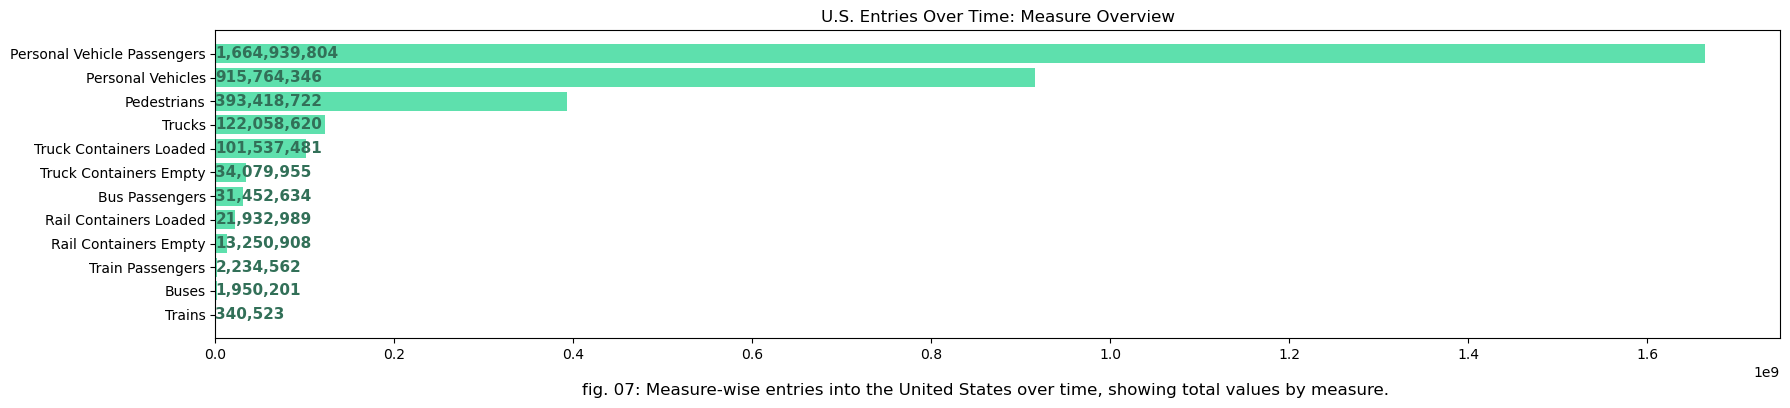

In [150]:

measure_entry = finalized_broder_crossing_df.groupby('Measure_Code')['Value'].sum().reset_index()
measure_entry = measure_entry[['Measure_Code', 'Value']]

# Merge to get readable measure names
merged_df = measure_entry.merge(measure_table, on='Measure_Code')

# Sort by value for better visual flow
merged_df = merged_df.sort_values('Value')

# Plotting
fig, ax = plt.subplots(figsize=(18, 4))
bars = ax.barh(merged_df['Measure'], merged_df['Value'], color='#5EE0AD')

# Add value labels inside bars
for bar, value in zip(bars, merged_df['Value']):
    ax.text(
        x=bar.get_x() + 10,
        y=bar.get_y() + bar.get_height() / 2,
        s=f"{value:,}",
        va='center',
        ha='left',
        color='#327058',
        fontsize=11,
        fontweight='bold'
    )

# Aesthetic polish
ax.set_xlabel('')
ax.set_title('U.S. Entries Over Time: Measure Overview')
fig.text(0.55, 0, "fig. 07: Measure-wise entries into the United States over time, showing total values by measure.", ha='center', fontsize=12, color='black')
plt.tight_layout()
plt.show()


<div style="background-color: #CF2102; padding: 10px;">
<b>Significance of Zero Values Across Modes of Transport in Entry Data<b>
</div>


During the exploratory analysis of border crossing data, a significant number of records were found to have a value of zero, indicating no crossings recorded for that specific measure with combination to port and states.

These zero values are likely to reflect a mix of genuine and operational conditions:

Seasonal or Temporary Closures: Some smaller ports may not operate year-round.

Mode-Specific Inactivity: Certain transport modes (e.g., Pedestrians or Buses) may not be used at all ports every month.

Policy or Event Impacts: Border restrictions, holidays, or global events (e.g., COVID-19) may also lead to zero crossings.

Data Recording Gaps: Although unlikely from an official source, the possibility of missing or incomplete records cannot be ruled out entirely.

In [151]:

#Count How Many Zero-Value Rows Exist
zero_count = (df['Value'] == 0).sum()
print(f"Number of rows with zero value: {zero_count}")

#Percentage of Total
zero_percent = (zero_count / len(df)) * 100
print(f"Percentage of rows with zero value: {zero_percent:.2f}%")

Number of rows with zero value: 10825
Percentage of rows with zero value: 10.56%


Out of the total dataset, 10.56% of entries reported zero border crossings. These zero values are spread across multiple years, months, states, and transportation measures, suggesting a combination of seasonal effects, operational limitations and mode-specific inactivity.

Rather than treating these as errors or noise, they were retained for further analysis as they could offer important insights into low-traffic ports, inactive months or even policy effects like pandemic-related closures.

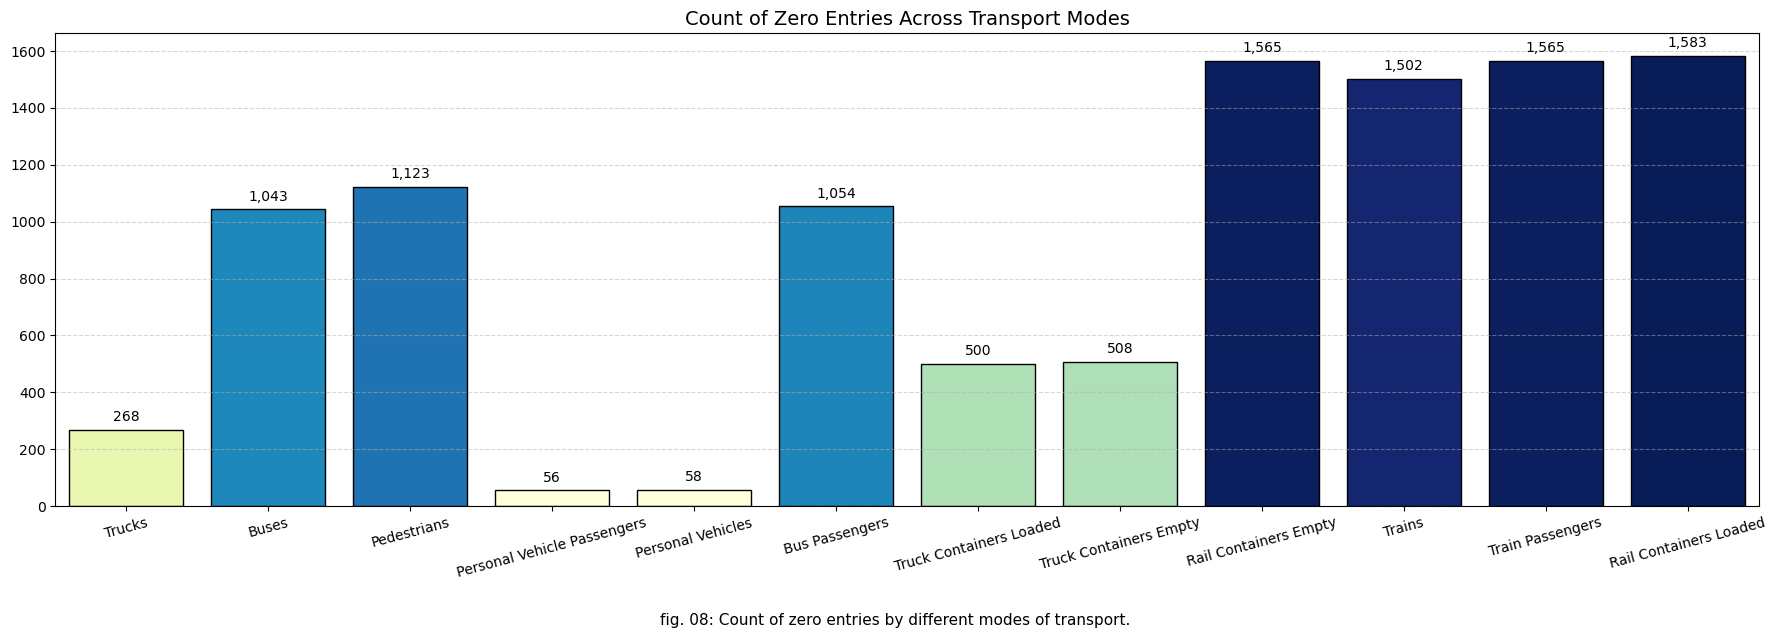

In [152]:


zero_value_rows = finalized_broder_crossing_df[finalized_broder_crossing_df['Value'] == 0].copy().groupby(['Measure_Code']).size().reset_index(name='Zero Count')

# Merge and handle unmatched Measure_Code (like 3)
merged_df = pd.merge(zero_value_rows, measure_table, on='Measure_Code', how='left')
#merged_df['Measure'] = merged_df['Measure'].fillna('Unknown')

# Normalize Zero Count and map to colors
norm = mcolors.Normalize(vmin=merged_df['Zero Count'].min(), vmax=merged_df['Zero Count'].max())
colormap = plt.get_cmap('YlGnBu')
colors = [colormap(norm(value)) for value in merged_df['Zero Count']]

# Plot
plt.figure(figsize=(18, 6))
bars = plt.bar(
    merged_df['Measure'],
    merged_df['Zero Count'],
    color=colors,
    edgecolor='black'
)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 20,
        f'{height:,}',
        ha='center',
        va='bottom',
        fontsize=10
    )

# Labels and styling
plt.title('Count of Zero Entries Across Transport Modes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xlim(-0.5, len(merged_df) - 0.5)
plt.xticks(rotation=15)
plt.figtext(0.5, -0.05, "fig. 08: Count of zero entries by different modes of transport.", ha='center', fontsize=11, color='black')
plt.tight_layout()
plt.show()
